# 이미지 분류

*Computer Vision* Cognitive Service는 이미지를 작업하기 위한 미리 빌드된 유용한 모델을 제공하지만, 종종 Computer Vision에 맞게 자체 모델을 학습시켜야 합니다. 예를 들어 Northwind Traders 소매업체가 계산대에서 카메라로 찍은 이미지를 바탕으로 고객이 구매하고자 하는 식료품을 식별하는 자동 계산 시스템을 만들고자 한다고 가정해 보겠습니다. 이를 위해서는 이미지를 분류하여 구입 중인 품목을 식별할 수 있는 분류 모델을 학습시켜야 합니다.

![클립보드를 들고서 사과, 바나나, 오렌지의 그림을 분류하고 있는 로봇](./images/image-classification.jpg)

Azure에서는 ***Custom Vision*** Cognitive Service를 사용하여 기존 이미지를 바탕으로 이미지 분류 모델을 학습시킬 수 있습니다. 이미지 분류 솔루션을 만드는 데는 두 가지 요소가 있습니다. 첫째, 기존 이미지를 사용하여 다양한 클래스를 인식하도록 모델을 학습시켜야 합니다. 그리고 모델의 학습이 완료되면 애플리케이션에서 사용할 수 있는 서비스로 모델을 게시해야 합니다.

## Custom Vision 리소스 만들기

Custom Vision 서비스를 사용하려면 모델을 *학습*시키는 데 사용할 수 있는 Azure 리소스 그리고 애플리케이션에서 사용하도록 모델을 *게시*할 수 있는 리소스가 필요합니다. 두 작업 중 하나 또는 둘 다에 사용되는 리소스는 일반 **Cognitive Services** 리소스일 수도 있고, 특정 **Custom Vision** 리소스일 수도 있습니다. 이러한 각 작업에 대해 동일한 Cognitive Services 리소스를 사용하거나, 각 작업에 대해 동일한 지역 내에서 서로 다른 리소스를 사용하여 비용을 따로 관리할 수 있습니다.

다음 지침을 따라 새로운 **Custom Vision** 리소스를 만듭니다.

1. 새 브라우저 탭에서 Azure Portal([https://portal.azure.com](https://portal.azure.com)) 을 열고, Azure 구독과 연결된 Microsoft 계정을 사용하여 로그인합니다.
2. **&#65291;리소스 만들기** 단추를 선택하고, *Custom Vision*을 검색하고, 다음 설정을 사용하여 **Custom Vision** 리소스를 만듭니다.
    - **옵션 만들기**: 모두
    - **구독**: *사용자의 Azure 구독*
    - **리소스 그룹**: *고유한 이름의 새 리소스 그룹 선택 또는 만들기*
    - **이름**: *고유한 이름 입력*
    - **학습 위치**: *사용 가능한 지역 선택*
    - **학습 가격 책정 계층**: F0
    - **예측 위치**: *학습 리소스와 동일한 지역*
    - **예측 가격 책정 계층**: F0

    > **참고**: 구독에 F0 Custom Vision 서비스가 이미 있는 경우에는 해당 서비스에 대해 **S0**을 선택합니다.

3. 리소스가 만들어질 때까지 기다리고 두 개의 Custom Vision 리소스가 프로비전되는 것을 확인합니다. 하나는 학습을 위한 것이고, 다른 하나는 예측을 위한 것입니다. 이러한 리소스는 자신이 만든 리소스 그룹으로 이동하여 확인할 수 있습니다.

## Custom Vision 프로젝트 만들기

개체 감지 모델을 학습시키기 위해 학습 리소스를 기반으로 Custom Vision 프로젝트를 만들어야 합니다. 이를 위해 Custom Vision 포털을 사용합니다.

1. https://aka.ms/fruit-images에서 학습 이미지를 다운로드하고 압축을 해제합니다. **참고:** 임시 해결 방법으로는 학습 이미지에 액세스할 수 없는 경우 https://www.github.com으로 이동한 다음 https://aka.ms/fruit-images로 이동합니다.  
2. 다른 브라우저 탭에서 Custom Vision 포털([https://customvision.ai](https://customvision.ai)) 을 엽니다. 메시지가 표시되면 Azure 구독과 연결된 Microsoft 계정을 사용하여 로그인하고 서비스 약관에 동의합니다.
3. Custom Vision 포털에서 다음 설정을 사용하여 새 프로젝트를 만듭니다.
    - **이름**: Grocery Checkout
    - **설명**: 식료품을 위한 이미지 분류
    - **리소스**: *앞서 만든 Custom Vision 리소스*
    - **프로젝트 유형**: 분류
    - **분류 유형**: 다중 클래스(이미지당 단일 태그)
    - **도메인**: 식품
4. **\[+\] 이미지 추가**를 클릭하고, 앞서 압축을 해제한 **apple** 폴더에 있는 모든 파일을 선택합니다. 그런 다음에 이미지 파일을 업로드하고, 다음과 같이 *apple* 태그를 지정합니다.

![사과를 apple 태그와 함께 업로드](./images/upload_apples.jpg)
   
5. 앞의 단계를 반복하여 **banana** 폴더에 있는 이미지를 *banana* 태그와 함께 업로드하고, **orange** 폴더에 있는 이미지를 *orange* 태그와 함께 업로드합니다.
6. Custom Vision 프로젝트에 업로드한 이미지를 살펴봅니다. 다음과 같이 각 클래스에 대해 15개의 이미지가 있어야 합니다.

![태그가 지정된 과일 이미지 - 사과 15개, 바나나 15개, 오렌지 15개](./images/fruit.jpg)
    
7. Custom Vision 프로젝트에서 이미지 위에 있는 **학습**을 클릭하여 태그가 지정된 이미지로 분류 모델을 학습시킵니다. **빠른 학습** 옵션을 선택하고 학습 반복이 완료될 때까지 기다립니다(1분 정도 걸릴 수 있음).
8. 모델 반복 학습이 완료되었으면 *정밀도*, *재현율* 및 *AP* 성능 메트릭을 검토합니다. 이러한 메트릭은 분류 모델의 예측 정확도를 측정하며 모두 높아야 합니다.

## 모델 테스트

애플리케이션에서 사용하도록 모델 반복을 게시하기 전에 테스트를 진행해야 합니다.

1. 성능 메트릭 위에서 **빠른 테스트**를 클릭합니다.
2. **이미지 URL** 상자에 `https://aka.ms/apple-image`를 입력하고 &#10132;을 클릭합니다.
3. 모델에서 반환된 예측을 확인합니다. 다음과 같이 *apple*의 가능성 점수가 가장 높아야 합니다.

![사과 클래스 예측이 담긴 이미지](./images/test-apple.jpg)

4. **빠른 테스트** 창을 닫습니다.

## 이미지 분류 모델 게시 및 소비

이제 학습된 모델을 게시하고 클라이언트 애플리케이션에서 사용할 준비가 되었습니다.

9. **&#128504; 게시**를 클릭하여 학습된 모델을 다음 설정과 함께 게시합니다.
    - **모델 이름**: groceries
    - **예측 리소스**: *앞서 만든 예측 리소스*.

### (!) 체크 인 
동일한 모델 이름인 **groceries**를 사용하셨습니까?   

10. 게시한 후에 **성능** 페이지 오른쪽 상단의 *설정*(&#9881;) 아이콘을 클릭하여 프로젝트 설정을 봅니다. 그런 다음에 **일반**(왼쪽에 있음) 아래에서 **프로젝트 ID**를 복사합니다. 아래로 스크롤하고 13단계 아래의 코드 셀에 붙여 넣어 **YOUR_PROJECT_ID**를 대체합니다.

![프로젝트 설정에 있는 프로젝트 ID](./images/cv_project_settings.jpg)

> _**참고**: 이 연습을 시작할 때 **Custom Vision** 리소스를 만드는 대신 **Cognitive Services** 리소스를 사용한 경우에는 프로젝트 설정의 오른쪽에서 해당 키 및 엔드포인트를 복사하고, 아래의 코드 셀에 붙여 넣고, 이를 실행하여 결과를 확인할 수 있습니다. 아니면 계속해서 아래의 단계를 완료하여 Custom Vision 예측 리소스의 키와 엔드포인트를 가져옵니다._

11. **프로젝트 설정** 페이지의 왼쪽 상단에서 *프로젝트 갤러리*(&#128065;) 아이콘을 클릭하여 Custom Vision 포털 홈 페이지로 돌아가면 이제 프로젝트가 나열되어 있습니다.

12. Custom Vision 포털 홈 페이지의 오른쪽 상단에서 *설정*(&#9881;) 아이콘을 클릭하여 Custom Vision 서비스의 설정을 봅니다. 그런 다음에 **리소스** 아래에서 **예측** 리소스(학습 리소스가 <u>아님</u>)를 확장하고 해당 **키** 및 **엔드포인트** 값을 13단계 아래의 코드 셀에 붙여 넣어 **YOUR_KEY** 및 **YOUR_ENDPOINT**를 대체합니다.

### (!) 체크 인 
**Custom Vision** 리소스를 사용하는 중이라면 **예측** 리소스(학습 리소스가 <u>아님</u>)를 사용하셨습니까?

![Custom Vision 설정에 있는 예측 리소스 키 및 엔드포인트](./images/cv_settings.jpg)

13. **셀 실행**(&#9655;) 단추(셀 왼쪽에 있음)를 클릭하여 변수를 프로젝트 ID, 키 및 엔드포인트 값으로 설정하고 아래의 코드 셀을 실행합니다.

In [1]:
project_id = 'e926b2a5-3182-429b-8f3d-2a414edebd11'
cv_key = 'f3be0689a16a40b6b0809cabf09e34df'
cv_endpoint = 'https://ai900kwcvtemp2-prediction.cognitiveservices.azure.com/'

model_name = 'fruit_check' # this must match the model name you set when publishing your model iteration (it's case-sensitive)!
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model fruit_check in project e926b2a5-3182-429b-8f3d-2a414edebd11


이제 키와 엔드포인트를 Custom Vision 클라이언트와 함께 사용하여 Custom Vision 분류 모델에 연결할 수 있습니다.

다음 코드 셀을 실행하여 게시된 모델을 통해 테스트 이미지 선택을 분류합니다.

> **참고**: 코드의 세부 사항에 대해 너무 걱정하지 마세요. Computer Vision SDK for Python을 사용하여 /data/image-classification/test-fruit 폴더에 있는 각 이미지에 대한 클래스 분류를 가져옵니다.

Classifying images in data/image-classification/test-fruit ...


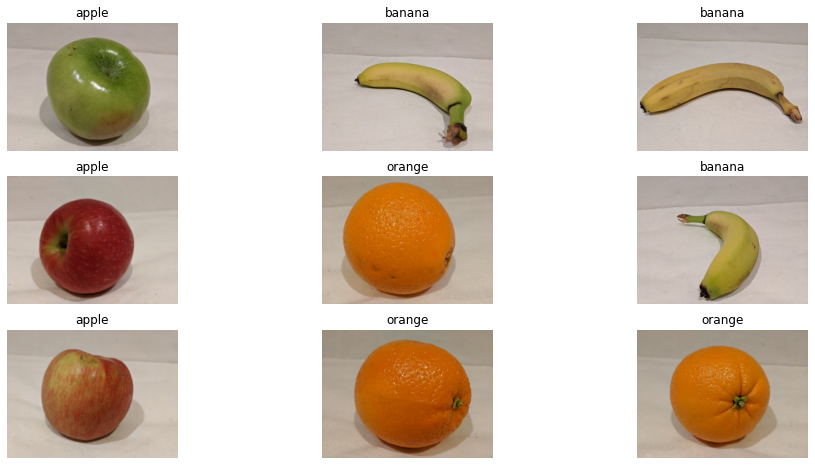

In [4]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Get the test images from the data/vision/test folder
test_folder = os.path.join('data', 'image-classification', 'test-fruit')
test_images = os.listdir(test_folder)

# Create an instance of the prediction service
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
custom_vision_client = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

# Create a figure to display the results
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes for each one
print('Classifying images in {} ...'.format(test_folder))
for i in range(len(test_images)):
    # Open the image, and use the custom vision model to classify it
    image_contents = open(os.path.join(test_folder, test_images[i]), "rb")
    classification = custom_vision_client.classify_image(project_id, model_name, image_contents.read())
    # The results include a prediction for each tag, in descending order of probability - get the first one
    prediction = classification.predictions[0].tag_name
    # Display the image with its predicted class
    img = Image.open(os.path.join(test_folder, test_images[i]))
    # 오류가 나오면 int를 추가해서 해야됨
    a=fig.add_subplot(int(len(test_images)/3), 3,i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(prediction)
plt.show()

다행히, 이미지 분류 모델이 이미지에 있는 식료품을 제대로 식별했습니다.

## 자세한 내용

Custom Vision 서비스는 이 연습에서 살펴본 것보다 더 많은 기능을 제공합니다. 예를 들어 Custom Vision 서비스를 사용하여 *개체 감지* 모델을 만들 수도 있습니다. 이 모델은 이미지에서 개체를 분류할 뿐만 아니라 이미지 내 개체의 위치를 표시하는 *경계 상자*도 식별할 수 있습니다.

Custom Vision Cognitive Service에 대해 자세히 알아보려면 [Custom Vision 설명서](https://docs.microsoft.com/azure/cognitive-services/custom-vision-service/home)를 참조하세요.